### Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

### Read data

In [32]:
train_dataset = np.loadtxt("./data/train.csv", skiprows=1, dtype='int', delimiter=",")
test_dataset = np.loadtxt("./data/test.csv", skiprows=1, dtype='int', delimiter=",")

### Image size

In [33]:
img_rows, img_cols = 28, 28

### Preparate the  data

In [34]:
train = train_dataset[:, 1:]
test = test_dataset

y = train_dataset[:, 0]
y = utils.to_categorical(y)

# Reformat data in 2D, backend Tensorflow
train = train.reshape(train.shape[0],img_rows, img_cols,1)
test = test.reshape(test.shape[0],img_rows, img_cols,1)

input_shape = (img_rows, img_cols, 1)

# Normalize data
train , test= train.astype("float32"), test.astype("float32")
train /= 255.0
test /= 255.0

### Visualize an image

([], <a list of 0 Text yticklabel objects>)

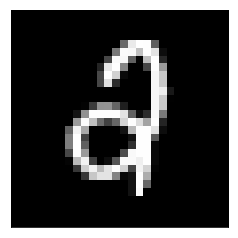

In [35]:
fig = plt.figure()
plt.imshow(train[10000][:,:,0], cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

### Take 10% from train data for validation

In [36]:
X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size = 0.1, random_state=2)

### Generate more data

In [37]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

### Look at generated data

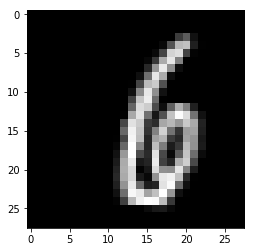

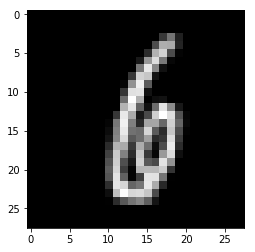

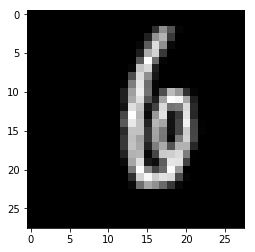

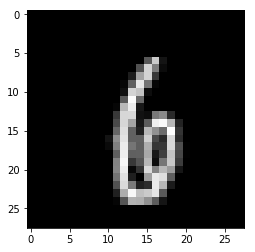

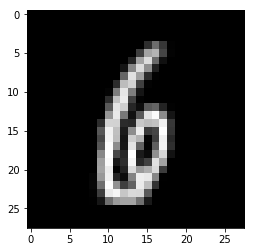

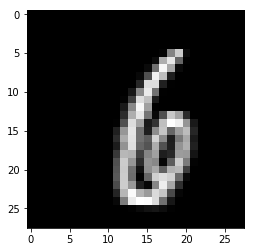

In [38]:
i = 0
data = X_train[10000]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0][:,:,0], cmap='gray', interpolation='none')
    i += 1
    if i % 6 == 0:
        break
plt.show()

### Create a consistent model and compile it

In [39]:
model = Sequential ()

model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
__________

### Create callbacks

In [40]:
сheckpoint = ModelCheckpoint('mnist-cnn.hdf5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)



In [41]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Fit the network

In [42]:
batch_size = 96

history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs=30,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

Epoch 1/30
390/393 [============================>.] - ETA: 0s - loss: 0.4212 - acc: 0.8646
Epoch 00001: val_acc improved from -inf to 0.97857, saving model to mnist-cnn.hdf5
393/393 [==============================] - 24s 62ms/step - loss: 0.4189 - acc: 0.8655 - val_loss: 0.0702 - val_acc: 0.9786
Epoch 2/30
390/393 [============================>.] - ETA: 0s - loss: 0.1287 - acc: 0.9607
Epoch 00002: val_acc improved from 0.97857 to 0.98429, saving model to mnist-cnn.hdf5
393/393 [==============================] - 8s 19ms/step - loss: 0.1283 - acc: 0.9608 - val_loss: 0.0507 - val_acc: 0.9843
Epoch 3/30
390/393 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9719- 
Epoch 00003: val_acc improved from 0.98429 to 0.98667, saving model to mnist-cnn.hdf5
393/393 [==============================] - 8s 20ms/step - loss: 0.0916 - acc: 0.9719 - val_loss: 0.0459 - val_acc: 0.9867
Epoch 4/30
391/393 [============================>.] - ETA: 0s - loss: 0.0787 - acc: 0.9756
Epoch 00004:

392/393 [============================>.] - ETA: 0s - loss: 0.0179 - acc: 0.9949
Epoch 00029: val_acc did not improve from 0.99619
393/393 [==============================] - 8s 19ms/step - loss: 0.0179 - acc: 0.9949 - val_loss: 0.0162 - val_acc: 0.9957
Epoch 30/30
391/393 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9941
Epoch 00030: val_acc did not improve from 0.99619
393/393 [==============================] - 8s 19ms/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0168 - val_acc: 0.9960


In [43]:
model.load_weights('mnist-cnn.hdf5')

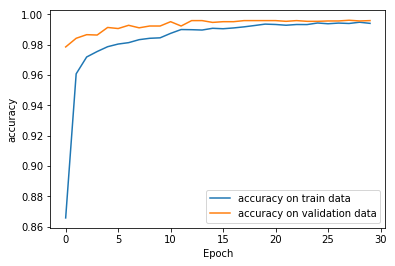

In [44]:
plt.plot(history.history['acc'], 
         label='accuracy on train data')
plt.plot(history.history['val_acc'], 
         label='accuracy on validation data')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Making predictions and converting from categorical to classed

In [46]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

### Save the result

In [47]:
output = pd.DataFrame(columns = ['ImageId', 'Label'])
output['ImageId'] = range(1, 28001)
output['Label'] = predictions
output.to_csv('Output.csv', index = False)

## I reached top 10% on the leaderboard with the final score 0.99628. My previous model was without image generator and the score was 0.99357. So, we can see that generators can highly improve your model.